In [43]:
#PASO 1 DATASET REGRESIÓN LOGISTICA
#Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [32]:
#Cargue de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [33]:
#Cargar el dataset
data = pd.read_csv("C:/Unad/heart_cleveland_upload.csv", sep=";") 

In [39]:
#Cargue y Exploracion del dataset
data.head(30) 
data.info()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        297 non-null    int64
 1   sex        297 non-null    int64
 2   cp         297 non-null    int64
 3   trestbps   297 non-null    int64
 4   chol       297 non-null    int64
 5   fbs        297 non-null    int64
 6   restecg    297 non-null    int64
 7   thalach    297 non-null    int64
 8   exang      297 non-null    int64
 9   oldpeak    297 non-null    int64
 10  slope      297 non-null    int64
 11  ca         297 non-null    int64
 12  thal       297 non-null    int64
 13  condition  297 non-null    int64
dtypes: int64(14)
memory usage: 32.6 KB


(297, 14)

In [35]:
#Explorar la estructura de los datos
data.info()  # Ver tipos de datos y valores nulos
data.describe()  # Estadísticas generales
data.head()  # Primeras filas del dataset
data.shape  # Dimensiones del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        297 non-null    int64
 1   sex        297 non-null    int64
 2   cp         297 non-null    int64
 3   trestbps   297 non-null    int64
 4   chol       297 non-null    int64
 5   fbs        297 non-null    int64
 6   restecg    297 non-null    int64
 7   thalach    297 non-null    int64
 8   exang      297 non-null    int64
 9   oldpeak    297 non-null    int64
 10  slope      297 non-null    int64
 11  ca         297 non-null    int64
 12  thal       297 non-null    int64
 13  condition  297 non-null    int64
dtypes: int64(14)
memory usage: 32.6 KB


(297, 14)

In [36]:
#inspeccionar los datos
print("Primeras filas del Dataframe:")
print(data.head())

print("\nInformación del Dataframe:")
print(data.info())

print("\nValores nulos en el Dataframe:")
print(data.isnull().sum())

Primeras filas del Dataframe:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0        1      1   
1   69    0   0       140   239    0        0      151      0       18      0   
2   66    0   0       150   226    0        0      114      0       26      2   
3   65    1   0       138   282    1        2      174      0       14      1   
4   64    1   0       110   211    0        2      144      1       18      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        297 non-null    int64
 1   sex        297 non-null    int64
 2   cp         297 non-null    int64
 3   trest

In [37]:
#resumen estadistico 
print("\nResumen estadístico:")
print(data.describe())


Resumen estadístico:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    8.797980    0.602694    0.676768   
std  

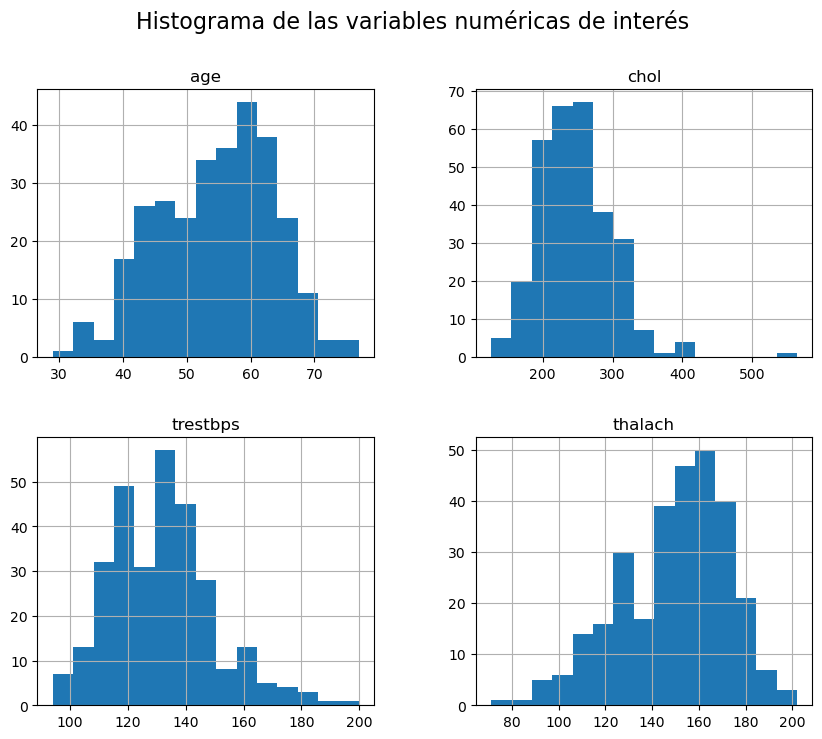

In [31]:
#visualización de histograma de todas las variables numéricas de interés
columns_to_plot = ["age", "chol", "trestbps", "thalach"]
data[columns_to_plot].hist(bins=15, figsize=(10,8))
plt.suptitle("Histograma de las variables numéricas de interés", fontsize=16)
plt.show()



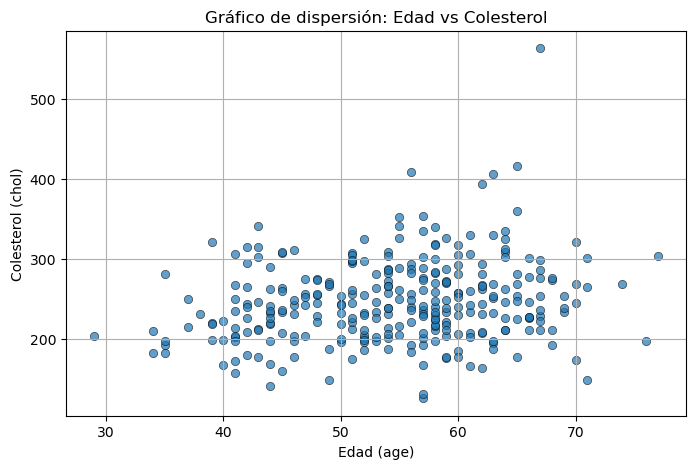

In [38]:
#Visualización de grafico de dispersión entre dos variables age y chol
# Gráfico de dispersión entre age y chol
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["age"], y=data["chol"], alpha=0.7, edgecolor="k")

# Personalización del gráfico
plt.xlabel("Edad (age)")
plt.ylabel("Colesterol (chol)")
plt.title("Gráfico de dispersión: Edad vs Colesterol")
plt.grid(True)
plt.show()

In [ ]:
#PASO 2 DATASET REGRESIÓN LOGISTICA
#Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [58]:
#Eliminamos duplicados
data = data.drop_duplicates()
print(f"Duplicados eliminados: {data.duplicated().sum()}")


Duplicados eliminados: 0


In [60]:
#Verificar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [61]:
#Imputación de valores faltantes (si los hay)
imputer = SimpleImputer(strategy='median')
data.iloc[:, :] = imputer.fit_transform(data) 
print("Resumen estadístico después de imputación:")
print(data.describe())


Resumen estadístico después de imputación:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    8.797980    0.602694

In [62]:
#One-Hot Encoding para variables categóricas
categorical_features = ['cp', 'thal', 'restecg']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
print("Primeras filas después de One-Hot Encoding:")
print(data.head())


Primeras filas después de One-Hot Encoding:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0        1      1   
1   69    0   0       140   239    0        0      151      0       18      0   
2   66    0   0       150   226    0        0      114      0       26      2   
3   65    1   0       138   282    1        2      174      0       14      1   
4   64    1   0       110   211    0        2      144      1       18      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [63]:
#Escalar las variables numéricas
scaler = StandardScaler()
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_encoded[num_features] = scaler.fit_transform(data_encoded[num_features])
print("Primeras filas después de escalado:")
print(data[num_features].head())


Primeras filas después de escalado:
   age  trestbps  chol  thalach  oldpeak
0   69       160   234      131        1
1   69       140   239      151       18
2   66       150   226      114       26
3   65       138   282      174       14
4   64       110   211      144       18


In [67]:
#Eliminación de valores atípicos usando IQR
Q1 = data_encoded[num_features].quantile(0.25)
Q3 = data_encoded[num_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned = data_encoded[~((data_encoded[num_features] < lower_bound) | (data_encoded[num_features] > upper_bound)).any(axis=1)]
print(f"Registros antes del filtrado de outliers: {len(data)}")
print(f"Registros después del filtrado de outliers: {len(data_cleaned)}")


Registros antes del filtrado de outliers: 297
Registros después del filtrado de outliers: 273


In [ ]:
#PASO 3 DATASET REGRESIÓN LOGISTICA
#Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['condition'])  # Todas las columnas menos la objetivo
y = data['condition']

In [70]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Selección de características con SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # Evalúa todas las características
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X.columns[selector.get_support()]

In [72]:
# Crear y entrenar modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# Obtener importancia de características
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

C:\Users\IngeJohan2\AppData\Local\Temp\ipykernel_23512\297780488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


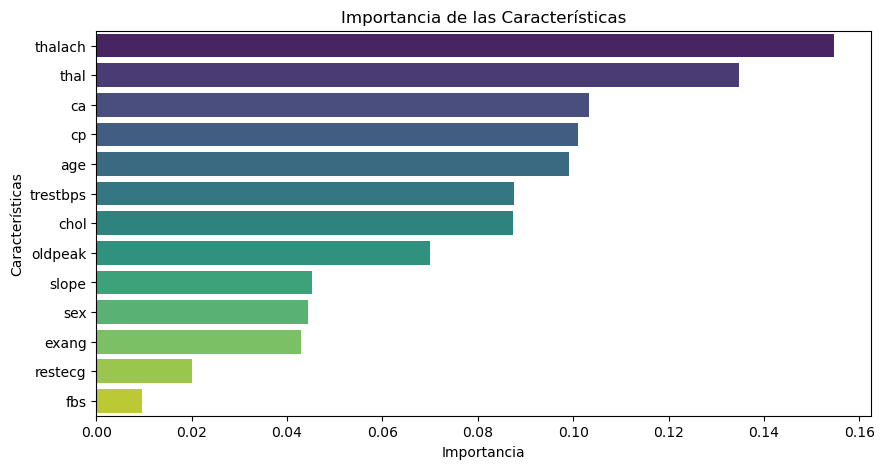

In [74]:
# Visualizar importancias
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()

In [ ]:
#PASO 4 DATASET REGRESIÓN LOGISTICA
#Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [76]:
# Separar las características (X) y la variable objetivo (y)
X = data.drop('condition', axis=1)  # Todas las columnas menos 'condition'
y = data['condition']  # Variable objetivo

In [77]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Crear el modelo de Random Forest
model = RandomForestClassifier(random_state=42)

In [79]:
# Ajustar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Obtener la importancia de las características
importances = model.feature_importances_

In [81]:
# Crear un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

In [82]:
# Ordenar las características por su importancia
top_features = feature_importances.sort_values(by='Importance', ascending=False)

C:\Users\IngeJohan2\AppData\Local\Temp\ipykernel_23512\3739572353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


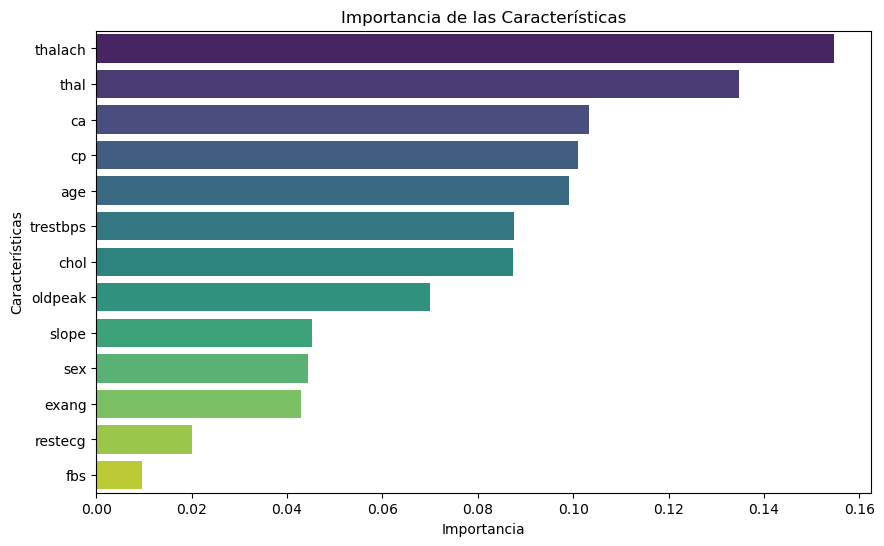

In [83]:
# Visualizar las importancias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()

In [84]:
# División del dataset en Train y Test para evaluar el modelo
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')

Tamaño del conjunto de entrenamiento: 237 muestras
Tamaño del conjunto de prueba: 60 muestras


In [ ]:
#PASO 5 DATASET REGRESIÓN LOGISTICA
#Entrenar el modelo configurando los diferentes hiperparámetros.


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [88]:
# Crear un modelo Random Forest con hiperparámetros ajustados
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [90]:
# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [92]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

In [94]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [96]:
print("Precisión del modelo:", accuracy)
print("\nInforme de clasificación:\n", report)

Precisión del modelo: 0.7833333333333333

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



In [98]:
#PASO 6 DATASET REGRESIÓN LOGISTICA
#Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [100]:
from sklearn.metrics import classification_report, accuracy_score

In [102]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [104]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7833333333333333


In [106]:
# Informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



In [ ]:
#PASO 7 DATASET REGRESIÓN LOGISTICA
#Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

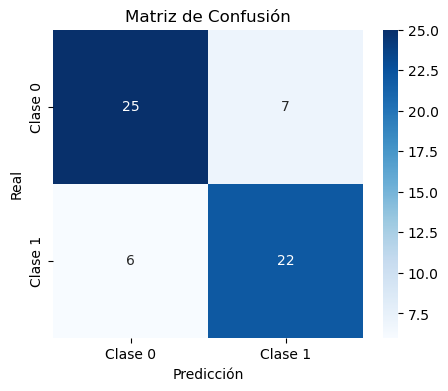

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


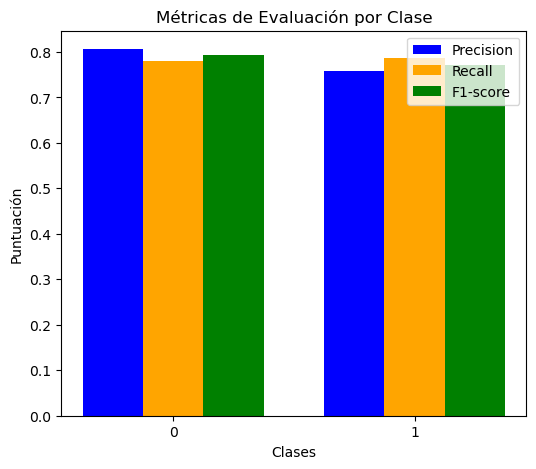

In [110]:
import numpy as np
from sklearn.metrics import classification_report

# Obtener métricas del informe de clasificación
report = classification_report(y_test, y_pred, output_dict=True)

# Extraer valores de Precision, Recall y F1-score
labels = list(report.keys())[:-3]  # Excluir 'accuracy', 'macro avg', 'weighted avg'
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

x = np.arange(len(labels))  # Posiciones en el eje X
width = 0.25  # Ancho de las barras

# Gráfico de barras
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width, precision, width, label='Precision', color='blue')
ax.bar(x, recall, width, label='Recall', color='orange')
ax.bar(x + width, f1_score, width, label='F1-score', color='green')

ax.set_xlabel('Clases')
ax.set_ylabel('Puntuación')
ax.set_title('Métricas de Evaluación por Clase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


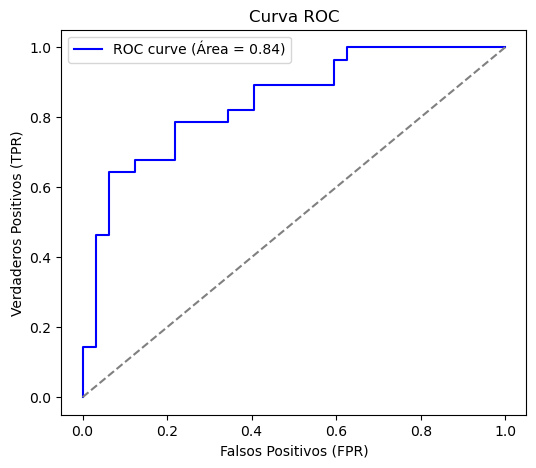

In [112]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades de la clase positiva
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Gráfico de la Curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (Área = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Línea de referencia aleatoria
plt.xlabel("Falsos Positivos (FPR)")
plt.ylabel("Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()


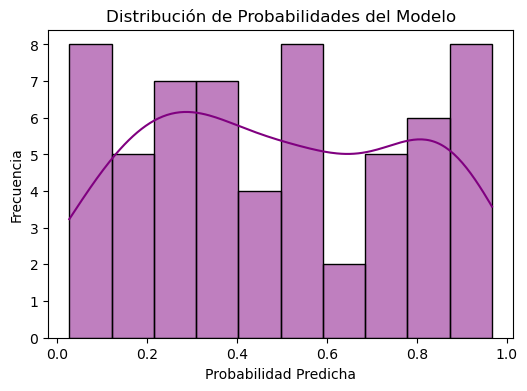

In [114]:
import seaborn as sns

# Graficar distribución de probabilidades
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=10, kde=True, color="purple")
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Frecuencia")
plt.title("Distribución de Probabilidades del Modelo")
plt.show()
